# Senior Consultancy Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import quandl
import math
import yahoo_fin.stock_info as si
from datetime import datetime, timedelta

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


# Bollinger

C:\Users\merin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  """


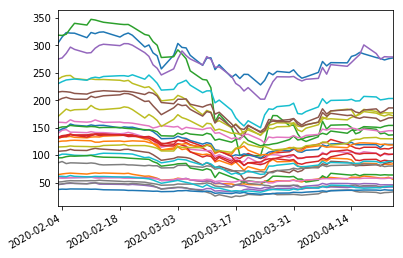

In [2]:
df=pd.DataFrame()
dow_jones_tickers = si.tickers_dow()
prices = list(map(si.get_live_price, dow_jones_tickers))
for ticker in dow_jones_tickers:
    si.get_data(ticker,"2020-02-01")['open'].plot('line')
    df[ticker]=si.get_data(ticker,"2020-02-01")['open']

In [3]:
df.tail()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM
2020-04-20,277.950012,84.589996,147.210007,114.440002,41.919998,82.660004,103.580002,32.180000,179.699997,206.130005,...,36.380001,121.470001,64.500000,103.290001,285.299988,167.330002,58.099998,44.160000,132.389999,40.750000
2020-04-21,276.279999,80.730003,139.009995,111.040001,41.830002,80.279999,100.010002,30.400000,175.440002,200.750000,...,35.779999,119.500000,63.619999,98.489998,274.950012,162.000000,57.389999,42.040001,130.070007,40.400002
2020-04-22,273.609985,83.599998,140.419998,112.029999,41.270000,84.949997,101.800003,31.799999,177.500000,201.889999,...,36.959999,119.989998,64.320000,103.510002,279.579987,164.660004,57.410000,42.900002,130.000000,42.599998
2020-04-23,275.869995,83.239998,136.500000,111.330002,41.889999,86.300003,100.650002,32.099998,177.000000,203.320007,...,36.279999,118.650002,63.889999,101.750000,279.059998,167.880005,58.119999,43.130001,129.850006,43.130001
2020-04-24,277.200012,84.129997,137.000000,113.989998,41.840000,88.480003,101.779999,33.040001,177.000000,203.320007,...,36.279999,118.650002,63.889999,101.750000,279.059998,168.440002,58.119999,43.689999,129.850006,43.130001


In [4]:
df_bollinger=df.copy()
for ticker in dow_jones_tickers:
    df_bollinger['30 Day MA_'+ticker] = df_bollinger[ticker].rolling(window=10).mean()
    df_bollinger['30 Day STD_'+ticker] = df_bollinger[ticker].rolling(window=10).std() 
    df_bollinger['Upper Band_'+ticker] = df_bollinger['30 Day MA_'+ticker] + (df_bollinger['30 Day STD_'+ticker] * 2)
    df_bollinger['Lower Band_'+ticker] = df_bollinger['30 Day MA_'+ticker] - (df_bollinger['30 Day STD_'+ticker] * 2)

In [5]:
df_bollinger.tail()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,Upper Band_WBA,Lower Band_WBA,30 Day MA_WMT,30 Day STD_WMT,Upper Band_WMT,Lower Band_WMT,30 Day MA_XOM,30 Day STD_XOM,Upper Band_XOM,Lower Band_XOM
2020-04-20,277.950012,84.589996,147.210007,114.440002,41.919998,82.660004,103.580002,32.180000,179.699997,206.130005,...,45.829641,41.726361,125.518999,5.035874,135.590748,115.447251,41.975,1.933392,45.841784,38.108216
2020-04-21,276.279999,80.730003,139.009995,111.040001,41.830002,80.279999,100.010002,30.400000,175.440002,200.750000,...,45.787837,41.796165,126.620000,4.656073,135.932147,117.307853,42.027,1.876954,45.780908,38.273093
2020-04-22,273.609985,83.599998,140.419998,112.029999,41.270000,84.949997,101.800003,31.799999,177.500000,201.889999,...,45.805643,41.680358,127.222000,4.665976,136.553951,117.890049,41.997,1.863801,45.724603,38.269398
2020-04-23,275.869995,83.239998,136.500000,111.330002,41.889999,86.300003,100.650002,32.099998,177.000000,203.320007,...,45.807290,41.664711,127.838000,4.553128,136.944257,118.731744,42.115,1.897543,45.910087,38.319913
2020-04-24,277.200012,84.129997,137.000000,113.989998,41.840000,88.480003,101.779999,33.040001,177.000000,203.320007,...,45.821158,41.758843,129.001001,3.065858,135.132717,122.869285,41.882,1.552931,44.987863,38.776138


C:\Users\merin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

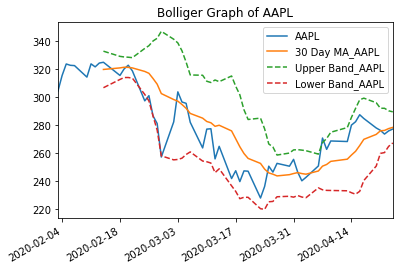

<Figure size 432x288 with 0 Axes>

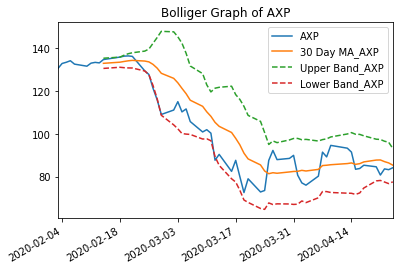

<Figure size 432x288 with 0 Axes>

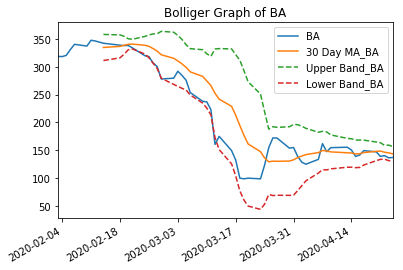

<Figure size 432x288 with 0 Axes>

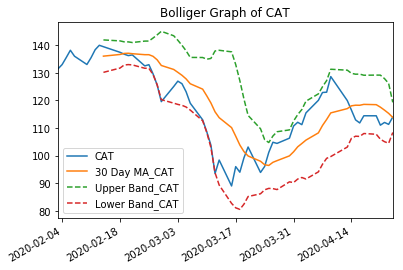

<Figure size 432x288 with 0 Axes>

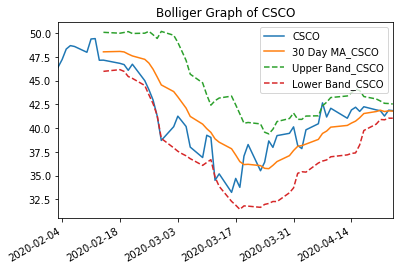

<Figure size 432x288 with 0 Axes>

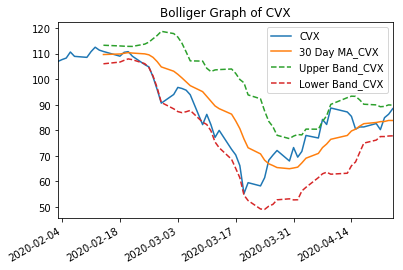

<Figure size 432x288 with 0 Axes>

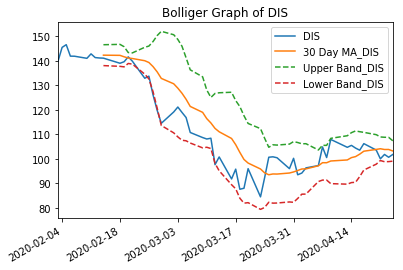

<Figure size 432x288 with 0 Axes>

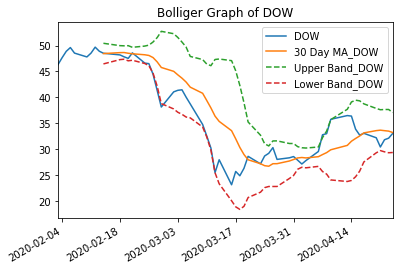

<Figure size 432x288 with 0 Axes>

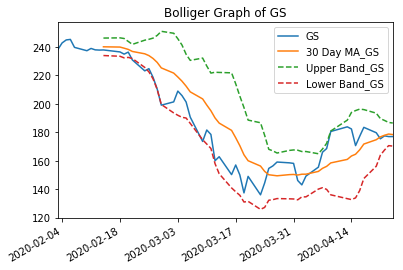

<Figure size 432x288 with 0 Axes>

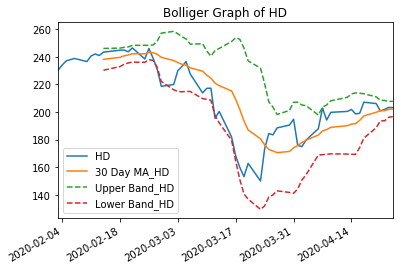

<Figure size 432x288 with 0 Axes>

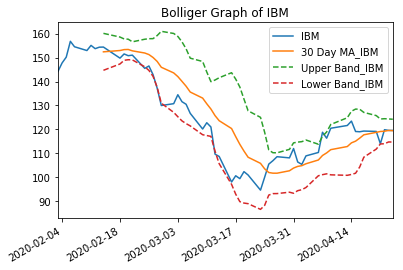

<Figure size 432x288 with 0 Axes>

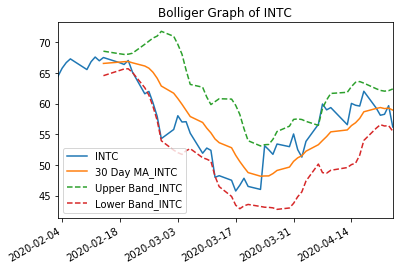

<Figure size 432x288 with 0 Axes>

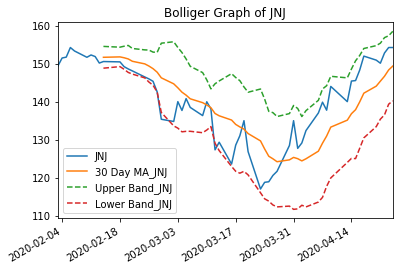

<Figure size 432x288 with 0 Axes>

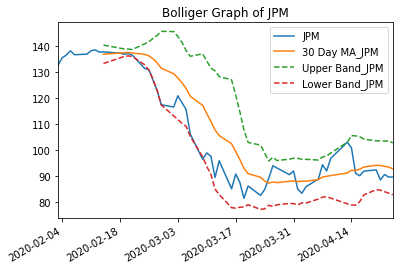

<Figure size 432x288 with 0 Axes>

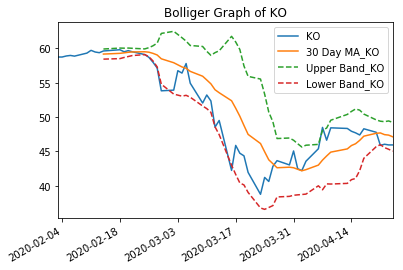

<Figure size 432x288 with 0 Axes>

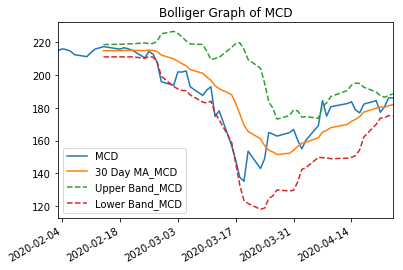

<Figure size 432x288 with 0 Axes>

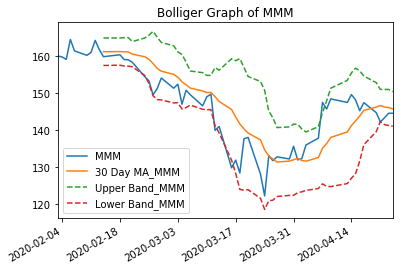

<Figure size 432x288 with 0 Axes>

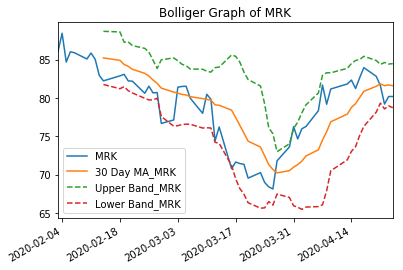

<Figure size 432x288 with 0 Axes>

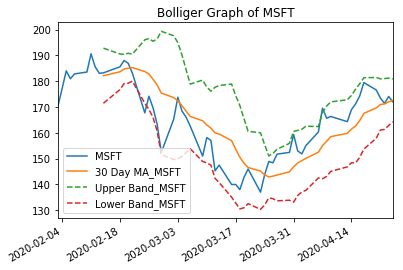

<Figure size 432x288 with 0 Axes>

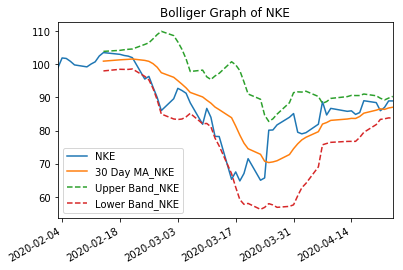

<Figure size 432x288 with 0 Axes>

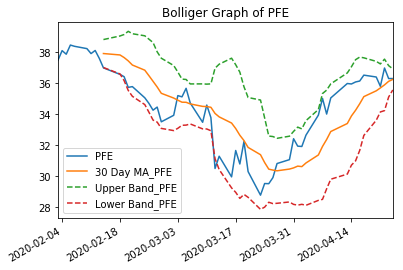

<Figure size 432x288 with 0 Axes>

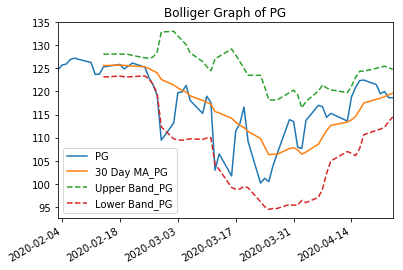

<Figure size 432x288 with 0 Axes>

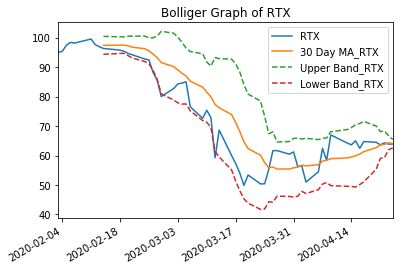

<Figure size 432x288 with 0 Axes>

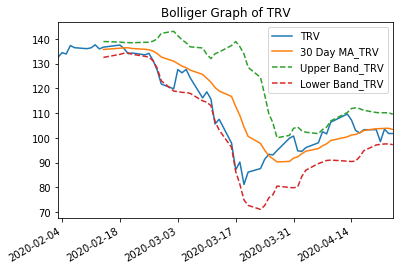

<Figure size 432x288 with 0 Axes>

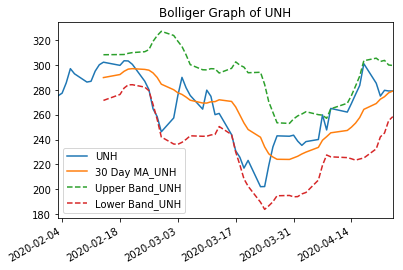

<Figure size 432x288 with 0 Axes>

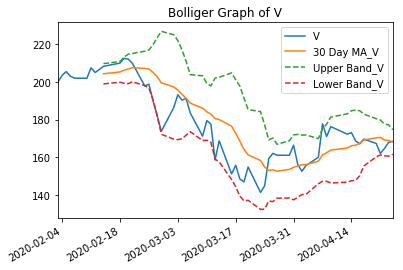

<Figure size 432x288 with 0 Axes>

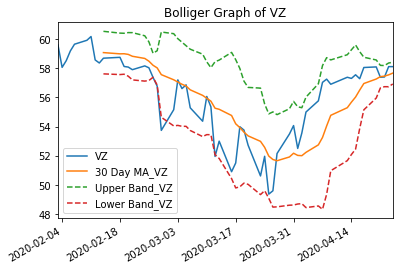

<Figure size 432x288 with 0 Axes>

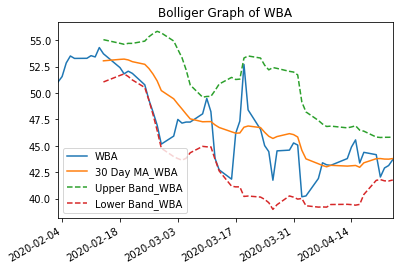

<Figure size 432x288 with 0 Axes>

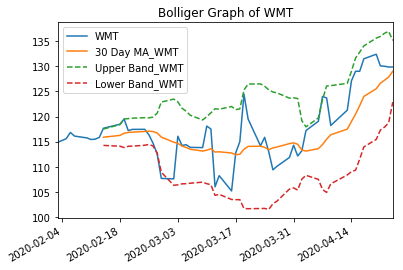

<Figure size 432x288 with 0 Axes>

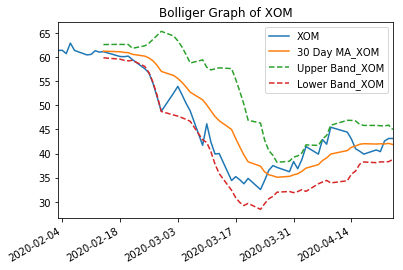

In [6]:
for ticker in dow_jones_tickers:
    df_plot = pd.DataFrame(df_bollinger,columns=[ticker,'30 Day MA_'+ticker,'Upper Band_'+ticker,'Lower Band_'+ticker])
    plt.figure()
    df_plot.plot(style=["-","-","--","--"],title="Bolliger Graph of "+ticker)

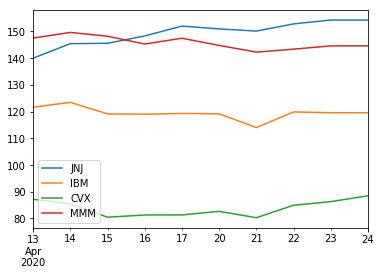

In [7]:
#Portofolio values: DIS, UNH, WMT, VZ
ticker_list=["JNJ","IBM","CVX","MMM"]
df_portfolio=df[ticker_list]
df_portfolio.tail(10).plot()

<Figure size 432x288 with 0 Axes>

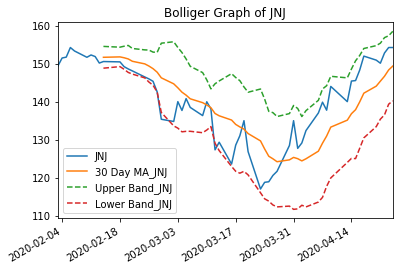

<Figure size 432x288 with 0 Axes>

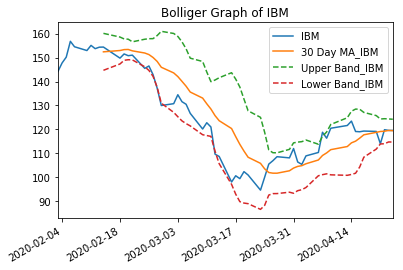

<Figure size 432x288 with 0 Axes>

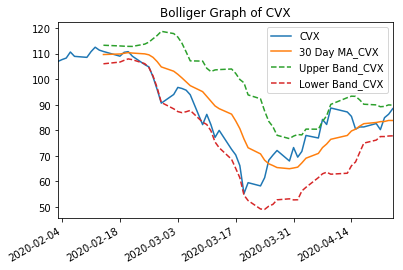

<Figure size 432x288 with 0 Axes>

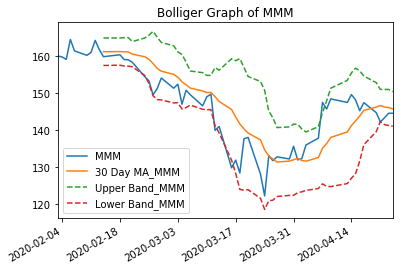

In [8]:
for ticker in ticker_list:
    df_plot = pd.DataFrame(df_bollinger,columns=[ticker,'30 Day MA_'+ticker,'Upper Band_'+ticker,'Lower Band_'+ticker])
    plt.figure()
    df_plot.plot(style=["-","-","--","--"],title="Bolliger Graph of "+ticker)

C:\Users\merin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


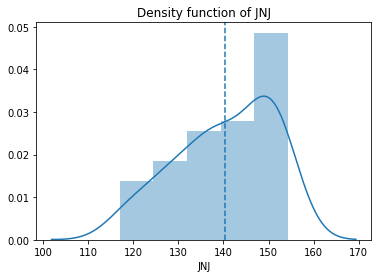

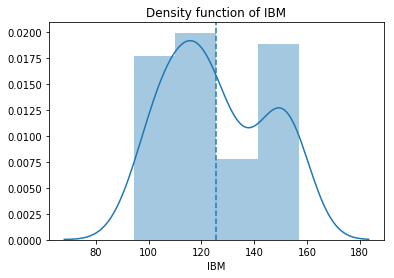

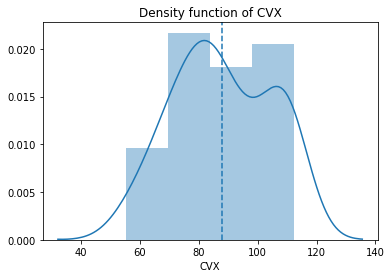

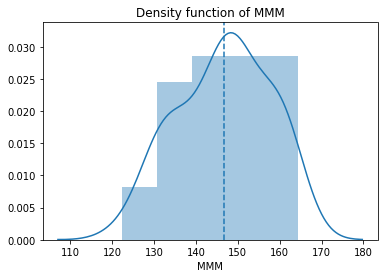

In [9]:
for ticker in ticker_list:
    plt.figure()
    sns.distplot(df_portfolio[ticker]).set_title("Density function of "+ticker)
    plt.axvline(df_portfolio[ticker].mean(),ls="--")

# Pivots

In [10]:
startdate = datetime.today() - timedelta(days=20)
enddate="2020-04-23"
df_list={}
ticker_list_for_loop=dow_jones_tickers
for ticker in ticker_list_for_loop:
    df_list["df_{0}".format(ticker)]=yf.download(ticker, startdate,enddate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********


Company:  AAPL 
Close Price:  276.1000061035156 
Pivot:  275.40000406901044 
S1:  272.9000142415365 
S2:  269.7000223795573 
R1:  278.5999959309896 
R2:  281.09998575846356

Company:  AXP 
Close Price:  82.54000091552734 
Pivot:  82.72333526611328 
S1:  81.78666687011719 
S2:  81.03333282470703 
R1:  83.47666931152344 
R2:  84.41333770751953

Company:  BA 
Close Price:  134.97000122070312 
Pivot:  136.77000427246094 
S1:  132.72000122070312 
S2:  130.47000122070312 
R1:  139.02000427246094 
R2:  143.07000732421875

Company:  CAT 
Close Price:  110.63999938964844 
Pivot:  110.64999898274739 
S1:  109.19999949137369 
S2:  107.75999959309895 
R1:  112.08999888102213 
R2:  113.53999837239583

Company:  CSCO 
Close Price:  41.7599983215332 
Pivot:  41.653333028157554 
S1:  41.21666590372722 
S2:  40.673333485921226 
R1:  42.196665445963546 
R2:  42.63333257039388

Company:  CVX 
Close Price:  84.44000244140625 
Pivot:  84.22000122070312 
S1:  83.19000244140625 
S2:  81.94000244140625 
R1: 

C:\Users\merin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



Company:  TRV 
Close Price:  101.79000091552734 
Pivot:  102.21333567301433 
S1:  100.01666768391928 
S2:  98.2433344523112 
R1:  103.9866689046224 
R2:  106.18333689371745

Company:  UNH 
Close Price:  277.0199890136719 
Pivot:  279.18332926432294 
S1:  274.5466512044271 
S2:  272.0733133951823 
R1:  281.65666707356775 
R2:  286.29334513346356

Company:  V 
Close Price:  166.58999633789062 
Pivot:  165.73666381835938 
S1:  163.77333068847656 
S2:  160.9566650390625 
R1:  168.55332946777344 
R2:  170.51666259765625

Company:  VZ 
Close Price:  57.9900016784668 
Pivot:  57.93000030517578 
S1:  57.290000915527344 
S2:  56.59000015258789 
R1:  58.630001068115234 
R2:  59.27000045776367

Company:  WBA 
Close Price:  43.310001373291016 
Pivot:  43.11000061035156 
S1:  42.77000045776367 
S2:  42.22999954223633 
R1:  43.650001525878906 
R2:  43.9900016784668

Company:  WMT 
Close Price:  131.58999633789062 
Pivot:  130.9566650390625 
S1:  129.5333251953125 
S2:  127.47665405273438 
R1:  133.

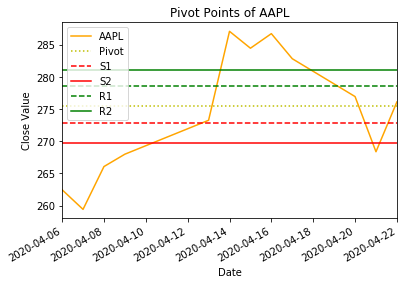

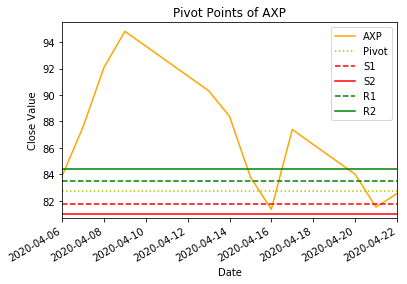

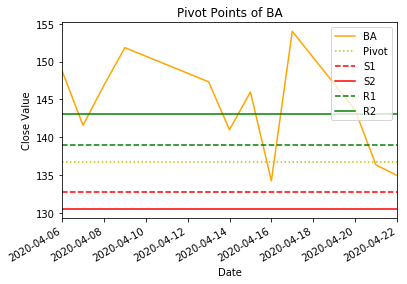

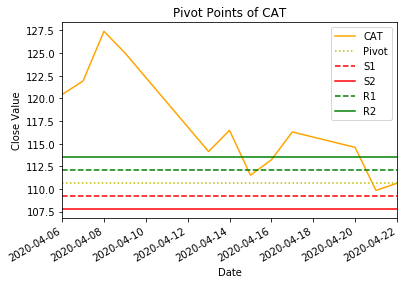

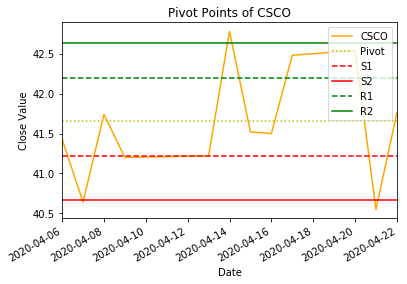

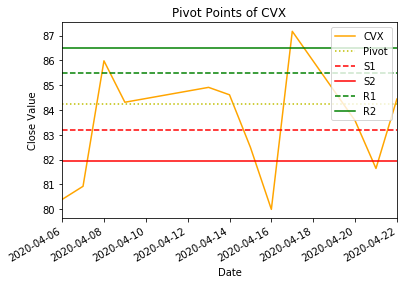

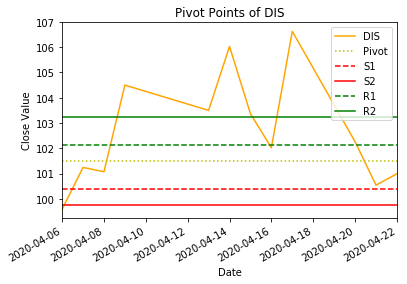

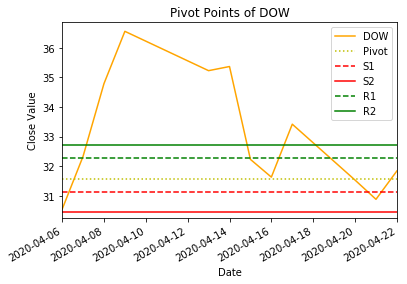

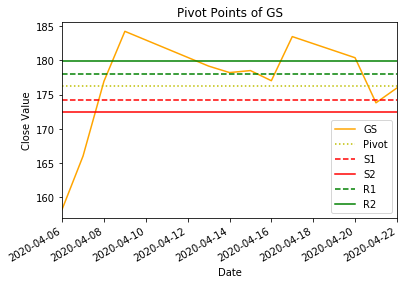

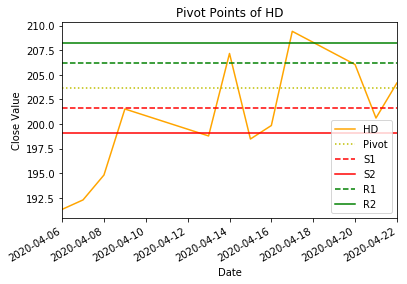

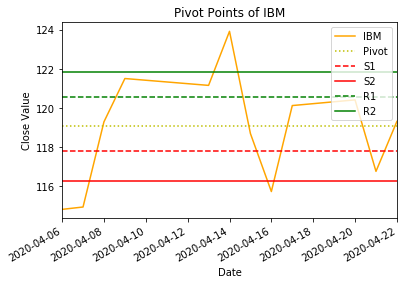

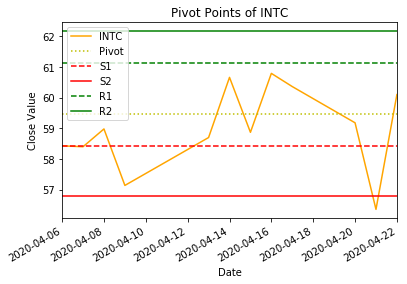

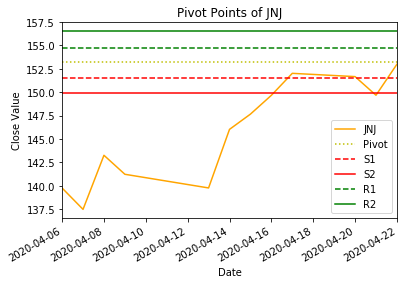

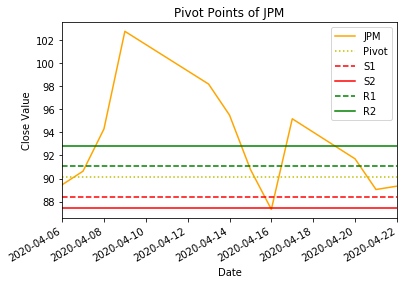

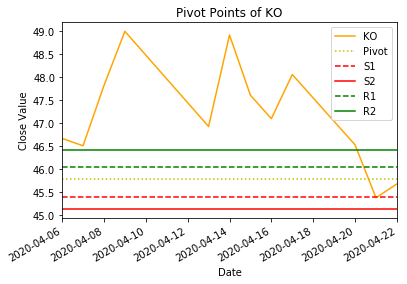

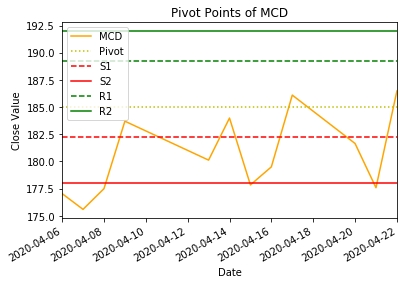

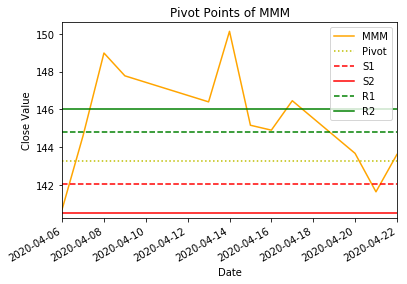

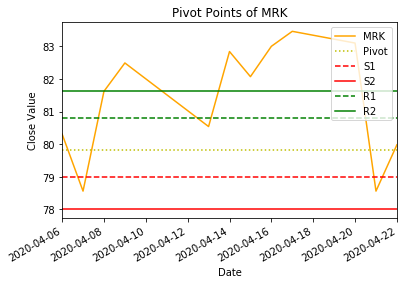

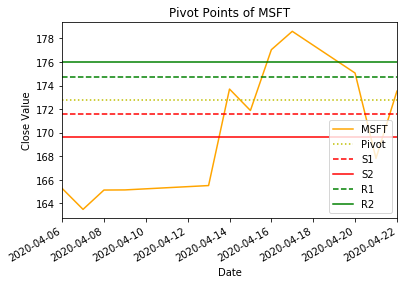

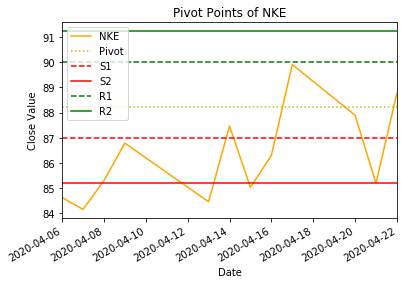

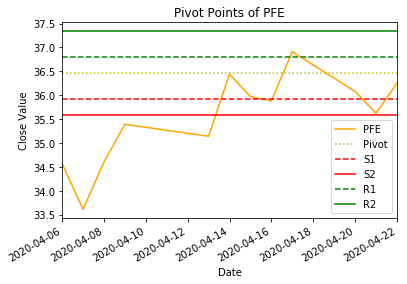

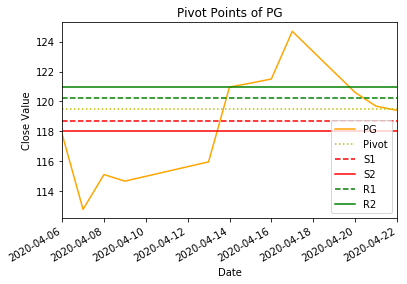

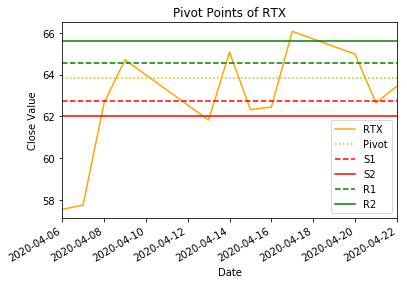

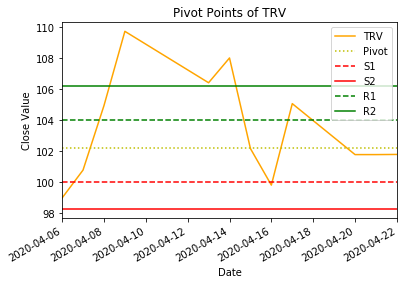

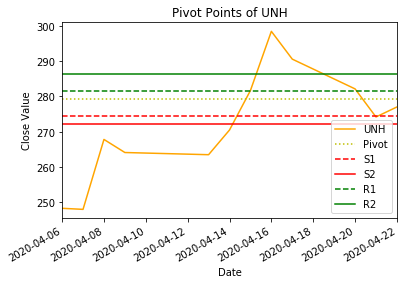

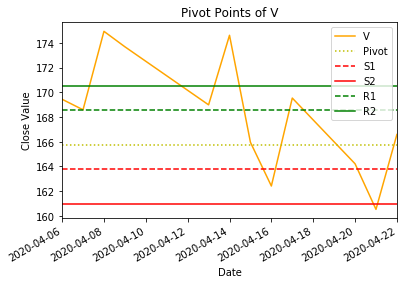

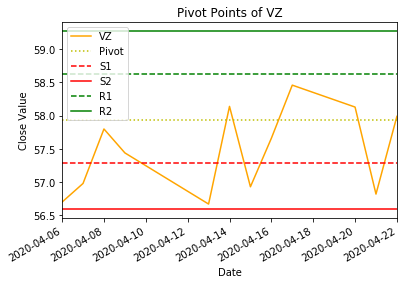

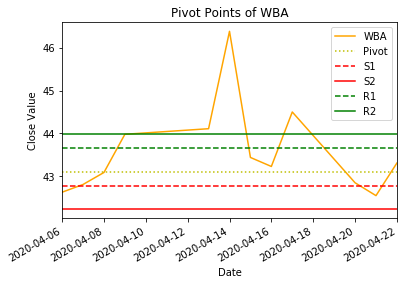

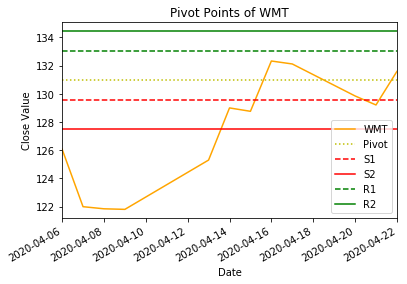

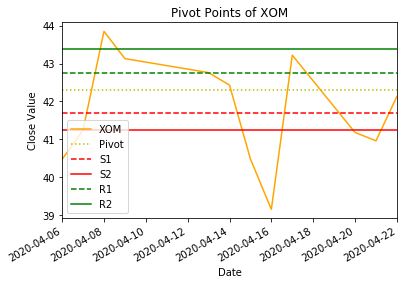

<Figure size 432x288 with 0 Axes>

In [12]:
for ticker in ticker_list_for_loop:
    tmp=df_list["df_{0}".format(ticker)]
    Pivot=(tmp["High"][-1]+tmp["Low"][-1]+tmp["Close"][-1])/3
    S1=(2*Pivot)-tmp["High"][-1]
    S2=Pivot-(tmp["High"][-1]-tmp["Low"][-1])
    R1=(2*Pivot)-tmp["Low"][-1]
    R2=Pivot+(tmp["High"][-1]-tmp["Low"][-1])
    if tmp["Close"][-1]/tmp["Close"][-2]>1 or 1:
        print("\nCompany: ",ticker,"\nClose Price: ",tmp["Close"][-1],"\nPivot: ",Pivot,"\nS1: ",S1,"\nS2: ",S2,"\nR1: ",R1,"\nR2: ",R2)
        tmp['Close'].plot(c='orange',figsize=(6,4),label=ticker)
        plt.axhline(Pivot,ls=":",c='y',label="Pivot")
        plt.axhline(S1,ls="--",c='r',label="S1")
        plt.axhline(S2,ls="-",c='r',label="S2")
        plt.axhline(R1,ls="--",c='g',label="R1")
        plt.axhline(R2,ls="-",c='g',label="R2")
        plt.title('Pivot Points of '+ticker)
        plt.ylabel('Close Value')
        plt.legend()
        plt.figure()